In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
#Loading data
csv_path = "crypto_data.csv"
crypto_df = pd.read_csv(csv_path)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:
crypto_df.set_index('Unnamed: 0', inplace=True)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000


In [4]:
# filter for currencies that are currently being traded
cleaning_crypto_df = crypto_df[crypto_df['IsTrading'] == True]
cleaning_crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [5]:
cleaning_crypto_df.drop(columns="IsTrading", inplace=True)
cleaning_crypto_df.head()

C:\Users\nallu\anaconda3\envs\dev\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [6]:
cleaned_crypto_df= cleaning_crypto_df.dropna()
cleaned_crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [7]:
cleaned_crypto_df = cleaned_crypto_df[cleaned_crypto_df["TotalCoinsMined"] > 0]
cleaned_crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [8]:
cleaned_crypto_df.drop(columns="CoinName", inplace=True)
cleaned_crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [9]:
X = pd.get_dummies(cleaned_crypto_df, columns=["Algorithm","ProofType"])
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [17]:
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         4.89609055e-15, -4.88368187e-15,  6.98047254e-17],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         5.02572983e-15, -4.68959529e-15,  1.06466280e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         7.92502380e-14,  1.79662556e-14, -2.82150102e-15],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -2.09093540e-16,  3.89074500e-14, -1.37146665e-13],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         1.62421864e-15, -3.22428176e-15,  4.84250967e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         4.65245536e-15, -3.26496511e-15, -1.85390895e-15]])

In [19]:
df_crypto_pca = pd.DataFrame(data=X_pca)
df_crypto_pca

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,4.324640e-15,9.752016e-12,-6.226071e-14,-0.007129,-1.319756,-0.051813,...,8.072303e-16,-7.956437e-15,7.872893e-15,2.924671e-15,-3.892443e-16,8.633923e-16,3.052522e-15,4.896091e-15,-4.883682e-15,6.980473e-17
1,-0.318434,1.032331,-0.591126,0.001386,4.295822e-15,9.672416e-12,-6.259683e-14,-0.007739,-1.322514,-0.056674,...,7.557869e-16,-7.815760e-15,7.776851e-15,3.078532e-15,-2.803243e-16,7.583107e-16,3.023820e-15,5.025730e-15,-4.689595e-15,1.064663e-15
2,2.305468,1.656383,-0.683617,0.004731,8.811888e-15,3.304775e-11,-9.075653e-14,-0.054781,-1.542879,-0.943951,...,1.585031e-13,7.673845e-14,-2.595322e-13,2.392680e-14,-6.133749e-14,5.696326e-15,-6.166034e-14,7.925024e-14,1.796626e-14,-2.821501e-15
3,-0.145184,-1.320593,0.192813,-0.001229,-2.835193e-15,-8.578812e-12,2.236011e-14,-0.002071,0.281463,0.251862,...,1.876415e-14,4.910524e-15,-4.078747e-14,3.040192e-15,9.186224e-15,3.091744e-15,-7.759718e-15,1.574858e-14,1.363431e-14,-1.999486e-14
4,-0.151768,-2.036192,0.396182,-0.001705,-7.135403e-15,-1.191114e-11,4.760759e-14,0.027735,0.519099,0.188820,...,-1.681262e-14,-2.808937e-15,1.897747e-13,-8.792341e-14,2.102746e-13,1.220217e-13,-1.844720e-14,7.230983e-14,1.693282e-13,-2.162062e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,1.664806e-14,-5.749387e-11,-4.025011e-14,-0.851713,2.041159,3.560713,...,1.445641e-14,-1.406340e-16,-4.242676e-14,2.445711e-15,1.296190e-14,-2.404153e-15,-8.550551e-15,1.776400e-14,1.514219e-14,-2.700414e-14
528,-0.333144,1.032071,-0.590740,0.001399,4.223369e-15,9.768210e-12,-6.244300e-14,-0.007154,-1.320125,-0.052460,...,8.195929e-16,-7.909121e-15,7.840867e-15,2.913481e-15,-5.260337e-16,6.535091e-16,3.062419e-15,5.004146e-15,-4.741964e-15,2.438518e-16
529,0.324349,-2.312308,0.421515,-0.001319,-4.420488e-15,-9.204796e-12,4.382577e-14,0.017309,0.161077,-0.047787,...,-9.239846e-15,-3.308421e-14,2.096125e-14,-2.273023e-14,8.705955e-14,-7.316181e-15,1.739290e-14,-2.090935e-16,3.890745e-14,-1.371467e-13
530,-0.149364,-2.049336,0.412968,-0.001745,-4.243369e-15,-1.218340e-11,4.722599e-14,0.028954,0.544389,0.233373,...,2.114391e-15,-1.316735e-15,-6.747534e-15,-4.158631e-15,1.235668e-15,2.648919e-15,1.290511e-15,1.624219e-15,-3.224282e-15,4.842510e-15


In [31]:
pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [32]:
pca.explained_variance_ratio_.sum()

0.9010870638268431

In [22]:
tsne=TSNE(perplexity = 15)

In [23]:
tsne_features = tsne.fit_transform(X_pca)
tsne_features

array([[ -9.267794 , -10.0281515],
       [ -8.0651655, -28.599268 ],
       [-38.258537 ,   2.4505568],
       ...,
       [ 23.81934  , -36.12883  ],
       [ 42.640682 ,  -1.0004305],
       [ -6.5066137,  11.093013 ]], dtype=float32)

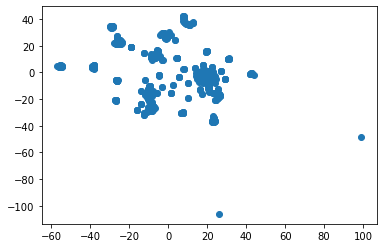

In [26]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])

Slight clustering but no distinct clusters.

In [30]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Create the elbow curve
elbow_curve = {"k": k, "inertia": inertia}
crypto_curve_df = pd.DataFrame(elbow_curve)
crypto_curve_df.hvplot.line(x="k", y="inertia", xticks=k, title="Crypto Elbow Curve")

C:\Users\nallu\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


:Curve   [k]   (inertia)

Since the data does not show a clear elbow trend, it is safe to conclude that there is no clustering taking place. 